<a href="https://colab.research.google.com/github/cblankenback/bus0007_labs/blob/main/lab9/Unsupervised_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Agorithms

## **Mall Customer Segmentation Model**

## Project Scope:

Malls are often indulged in the race to increase their customers and making sales. To achieve this task machine learning is being applied by many malls already.

It is amazing to realize the fact that how machine learning can aid in such ambitions. The shopping malls make use of their customers’ data and develop ML models to target the right audience for right product marketing.


**Your role:** Mall Customer data is an interesting dataset that has hypothetical customer data. It puts you in the shoes of the owner of a supermarket. You have customer data, and on this basis of the data, you have to divide the customers into various groups.

**Goal:** Build an unsupervised clustering model to segment customers into correct groups.

**Specifics:**

* Machine Learning task: Clustering model
* Target variable: N/A
* Input variables: Refer to data dictionary below
* Success Criteria: Cannot be validated beforehand


## Data Dictionary:

* **CustomerID:** Unique ID assigned to the customer
* **Gender:** Gender of the customer
* **Age:** Age of the customer
* **Income:** Annual Income of the customers in 1000 dollars
* **Spending_Score:** Score assigned between 1-100 by the mall based on customer' spending behavior

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [71]:
df = pd.read_csv('mall_customers.csv')
df.head()

,Customer_ID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
# Check quick stats of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer_ID     200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [73]:
# drop customer_id
df.drop(columns='Customer_ID', axis=1, inplace=True)

<Figure size 500x500 with 0 Axes>

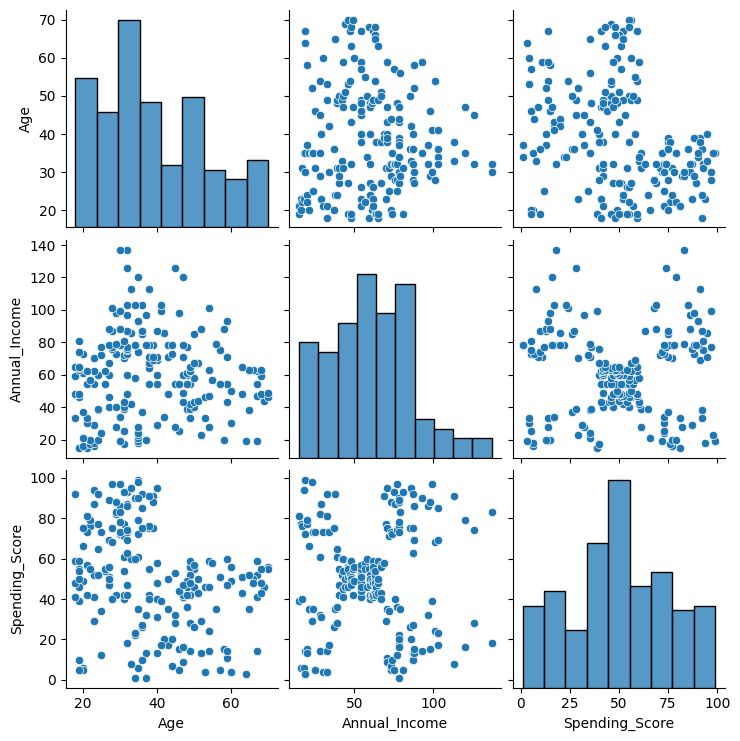

In [74]:
# let's plot a pairplot
plt.figure(figsize=(5,5))
sns.pairplot(df)

As a mall owner you are interested in the customer spending score. If you look at spending vs Age, you can observe that the spending score is high for customers between age 20-40, and relatively low for customers beyond 40.

* Remeber, K-means clustering is sensitive to outliers

In [75]:
# import kmeans model
from sklearn.cluster import KMeans

we will do this for now to visualise it, and later we will add more feature' and use the evaluation metric silhouette measure.

## Observe the plot for spending score and annual income

#### Can you spot the number of clusters?

In [76]:
# select features and store in X
X = df[['Annual_Income','Spending_Score']]

In [77]:
# Let' train our model on spending_score and annual_income
kmodel = KMeans(n_clusters=5, init='random')

In [78]:
#!pip install --upgrade threadpoolctl

In [79]:
# check your cluster centers
model = kmodel.fit(X)

In [80]:
# Check the cluster labels
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

<Axes: xlabel='Spending_Score', ylabel='Annual_Income'>

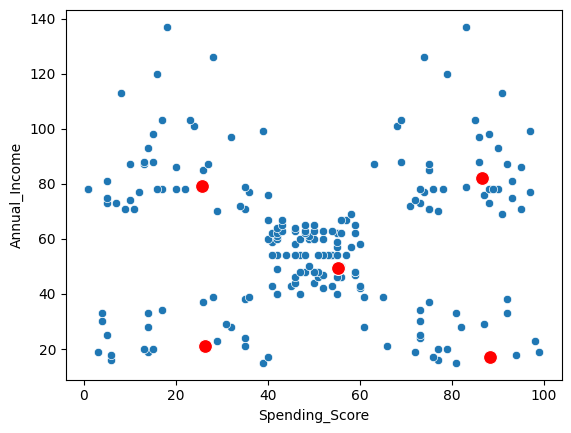

In [81]:
sns.scatterplot(data=X, x= X['Spending_Score'],y=X['Annual_Income'])

# Plot the centroids

sns.scatterplot(data = model.cluster_centers_, x= model.cluster_centers_[:, 0], y=model.cluster_centers_[:, 1], color='red', s=100)

In [82]:
# Put this data back in to the main dataframe corresponding to each observation
model.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [83]:
# check the dataset
df['Group'] = model.labels_
df.head()

,Gender,Age,Annual_Income,Spending_Score,Group
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


In [84]:
# check how many observations belong to each cluster
df['Group'].value_counts()

0    81
2    39
1    35
3    23
4    22
Name: Group, dtype: int64

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

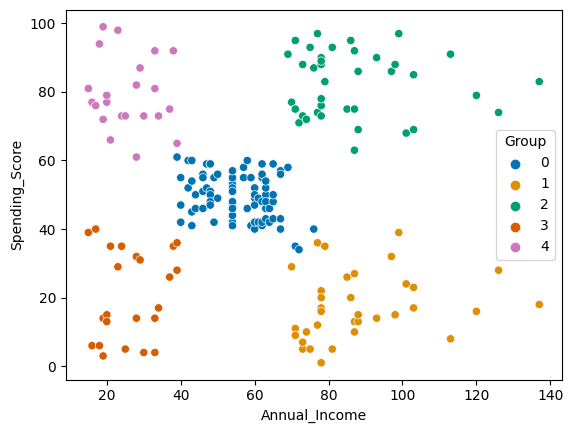

In [85]:
# Let' visualize these clusters
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Group', data=df,
                palette='colorblind')

## Elbow Method

Now use all the available features to create clusters

* We will analyze clusters from 3 to 8 and calculate the WSS scores. The WSS scores can be used to plot the Elbow Plot.

* WSS = Within Cluster Sum of Squares

In [86]:
# try using a for loop
clusters=[]
scores=[]

for k in range(3,8):
    kmodel = KMeans(n_clusters=k,  init='random')
    clusters.append(k)
    model = kmodel.fit(df[['Annual_Income','Spending_Score','Age']])
    score = model.inertia_
    scores.append(score)

In [87]:
# check labels
clusters, scores

([3, 4, 5, 6, 7],
 [143342.75157170603,
  104366.15145556197,
  75350.77917248776,
  58300.44332159069,
  51116.986944634315])

In [88]:
# Store the number of clusters and their respective WSS scores in a dataframe
wss = pd.DataFrame({'Cluster':clusters, 'Score': scores})
wss

,Cluster,Score
0,3,143342.751572
1,4,104366.151456
2,5,75350.779172
3,6,58300.443322
4,7,51116.986945


<Axes: xlabel='Cluster'>

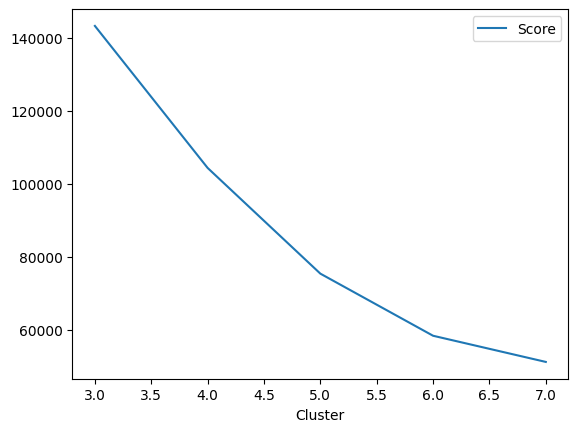

In [89]:
# Now, plot a Elbow plot
wss.plot(x='Cluster', y='Score')

We get 5/6 clusters as a best value of k using the WSS method.

## Silhouette Measure

In [90]:
# import silhouette_score
from sklearn.metrics import silhouette_score

In [91]:
# same as above, calculate sihouette score for each cluster using a for loop
# try using a for loop

clusters=[]
scores=[]

for k in range(3,8):

    kmodel = KMeans(n_clusters=k,  init='random')
    clusters.append(k)
    model = kmodel.fit(df[['Annual_Income','Spending_Score','Age']])
    score = silhouette_score(df[['Annual_Income','Spending_Score','Age']], model.labels_)
    scores.append(score)

In [92]:
# Store the number of clusters and their respective silhouette scores in a dataframe
clusters, scores

([3, 4, 5, 6, 7],
 [0.3839349967742105,
  0.40546302077733304,
  0.44446409171786105,
  0.4523566166018854,
  0.4412807576186172])

### Silhouette score is between -1 to +1

closer to +1 the clusters are better

In [93]:
# Now, plot the silhouette plot
sil = pd.DataFrame({'Cluster':clusters, 'Score': scores})
sil

,Cluster,Score
0,3,0.383935
1,4,0.405463
2,5,0.444464
3,6,0.452357
4,7,0.441281


<Axes: xlabel='Cluster'>

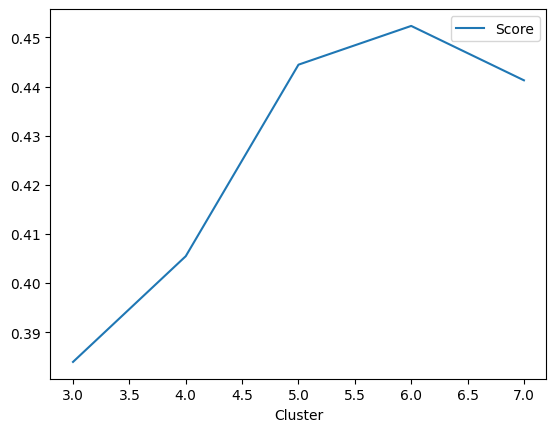

In [94]:
# Now, plot a Silhouette plot
sil.plot(x='Cluster', y='Score')

### Exercise:

Use argument `init=kmeans++` as a hyperparameter while training the model.
Test for spending_score and annual_income and check whether the centroids remain at the same location.

In scikit-learn, **KMeans++** is a commonly used initialization method for the KMeans clustering algorithm. The **KMeans++** initialization method was proposed to improve the convergence speed and accuracy of the algorithm.

The **KMeans++** initialization method works by selecting the initial centroids in a way that is more intelligent than random initialization. It starts by selecting a random point from the dataset as the first centroid, and then selects each subsequent centroid based on a probability distribution that favors points that are farther away from the already selected centroids.

This helps to ensure that the initial centroids are well spread out and representative of the dataset, which can lead to better clustering results.


In [95]:
clusters=[]
scores=[]
for k in range (3,8):
  kmodel = KMeans(n_clusters=k, init='k-means++')
  clusters.append(k)
  model = kmodel.fit(df [['Annual_Income', 'Spending_Score', 'Age']])
  score = silhouette_score(df[['Annual_Income', 'Spending_Score', 'Age' ]], model. labels_)
  scores.append (score)

In [96]:
import plotly.express as px
fig = px.scatter_3d(df, x = "Annual_Income", y= "Spending_Score", z= "Age")
fig. show()